# Challenge: What test to use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, kruskal, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [265]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [266]:
df.shape

(8594, 13)

In [267]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [268]:
df['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [269]:
countries = list(df.cntry.unique())
print(countries)

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']


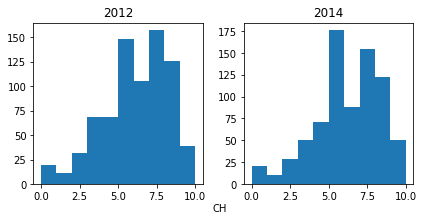

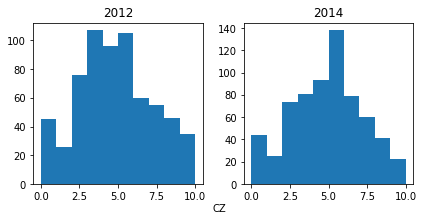

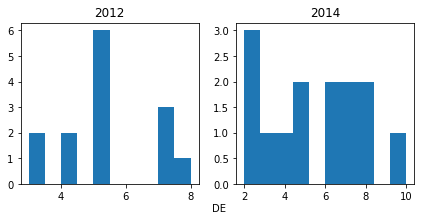

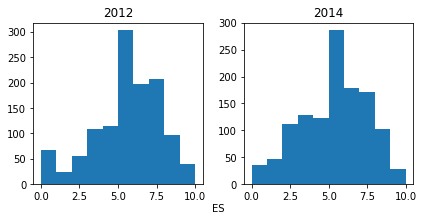

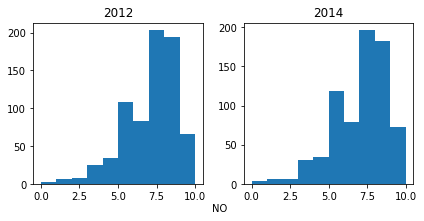

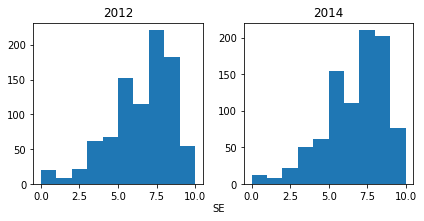

In [270]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    
    axs[0].hist((df.loc[(df['year']==6) & (df['cntry']==country)])['ppltrst'].dropna())
    axs[1].hist((df.loc[(df['year']==7) & (df['cntry']==country)])['ppltrst'].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()

In [271]:
df2 = df.dropna()

tukey = pairwise_tukeyhsd(endog=df2['ppltrst'],      # Data
                          groups=df2['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-1.346,-1.5768,-1.1151,True
CH,DE,-0.5032,-1.6582,0.6518,False
CH,ES,-0.6905,-0.8891,-0.492,True
CH,NO,0.8985,0.6774,1.1196,True
CH,SE,0.4165,0.2056,0.6274,True
CZ,DE,0.8428,-0.3146,2.0001,False
CZ,ES,0.6555,0.4439,0.867,True
CZ,NO,2.2445,2.0116,2.4773,True
CZ,SE,1.7625,1.5393,1.9857,True
DE,ES,-0.1873,-1.3386,0.964,False


By examining the histograms and using the tukey test, we can see that most of the distributions are non-normal. Since we have an A/B test, we should use a Wilcoxon signed-rank test.

In [272]:
for country in countries:
    ppltrst_2012 = df.loc[(df['year'] == 6) & (df['cntry'] == country)]['ppltrst']
    ppltrst_2014 = df.loc[(df['year'] == 7) & (df['cntry'] == country)]['ppltrst']
            
    print(country, '\n')
    print(wilcoxon(ppltrst_2012, ppltrst_2014))
    print('\nWilcoxon average 2012: {}'.format(ppltrst_2012.mean()))
    print('\nWilcoxon average 2014: {}'.format(ppltrst_2014.mean()))
    print('\nDifference: {}\n'.format(ppltrst_2014.mean()-ppltrst_2012.mean()))

CH 

WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

Wilcoxon average 2012: 5.677878395860285

Wilcoxon average 2014: 5.751617076326003

Difference: 0.07373868046571808

CZ 

WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

Wilcoxon average 2012: 4.362519201228879

Wilcoxon average 2014: 4.424657534246576

Difference: 0.062138333017697

DE 

WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

Wilcoxon average 2012: 5.214285714285714

Wilcoxon average 2014: 5.357142857142857

Difference: 0.14285714285714235

ES 

WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

Wilcoxon average 2012: 5.114591920857379

Wilcoxon average 2014: 4.895127993393889

Difference: -0.2194639274634893

NO 

WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

Wilcoxon average 2012: 6.64931506849315

Wilcoxon average 2014: 6.598630136986301

Difference: -0.05068493150684894

SE 

WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)

Wilcoxon av

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Using a 5% confidence interval, only Spain and Sweden had a meaningful difference, since they have pvalues less than 0.05. From their averages, it appears Spain is less trustful by -0.22 points, and Sweden is more trustful by +0.20 points.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

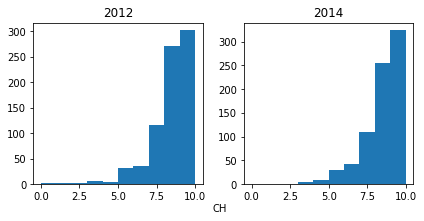

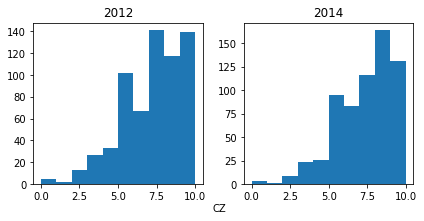

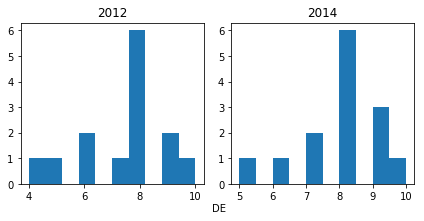

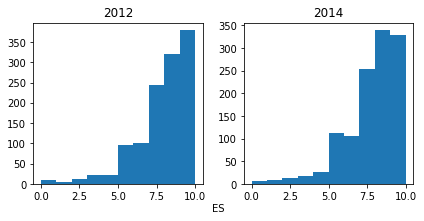

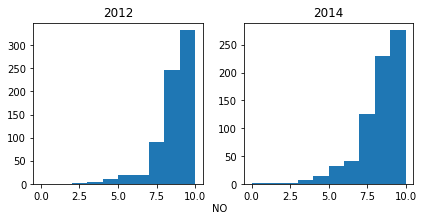

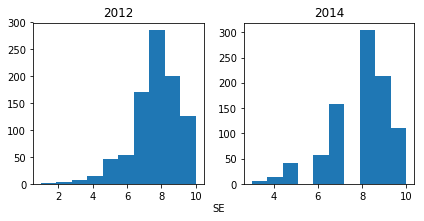

In [273]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))    
    
    axs[0].hist((df.loc[(df['year']==6) & (df['cntry']==country)])['happy'].dropna())
    axs[1].hist((df.loc[(df['year']==7) & (df['cntry']==country)])['happy'].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()

In [274]:
df2 = df.dropna()

tukey = pairwise_tukeyhsd(endog=df2['happy'],      # Data
                          groups=df2['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-1.2566,-1.441,-1.0721,True
CH,DE,-0.5206,-1.4435,0.4023,False
CH,ES,-0.6084,-0.7671,-0.4498,True
CH,NO,-0.0273,-0.204,0.1494,False
CH,SE,-0.1932,-0.3617,-0.0247,True
CZ,DE,0.7359,-0.1888,1.6607,False
CZ,ES,0.6481,0.4791,0.8171,True
CZ,NO,1.2292,1.0432,1.4153,True
CZ,SE,1.0634,0.8851,1.2417,True
DE,ES,-0.0878,-1.0077,0.8322,False


The distributions are non-normal, so we will use a non-parametric method, i.e. the Wilcoxon signed-rank test.

In [275]:
for country in countries:
    happy_2012 = df.loc[(df['year'] == 6) & (df['cntry'] == country)]['happy']
    happy_2014 = df.loc[(df['year'] == 7) & (df['cntry'] == country)]['happy']
            
    print(country, '\n')
    print(wilcoxon(happy_2012, happy_2014))
    print('\nWilcoxon average 2012: {}'.format(happy_2012.mean()))
    print('\nWilcoxon average 2014: {}'.format(happy_2014.mean()))
    print('\nDifference: {}\n'.format(happy_2014.mean()-happy_2012.mean()))

CH 

WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Wilcoxon average 2012: 8.088311688311688

Wilcoxon average 2014: 8.116429495472186

Difference: 0.028117807160498387

CZ 

WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

Wilcoxon average 2012: 6.7708978328173375

Wilcoxon average 2014: 6.914110429447852

Difference: 0.1432125966305149

DE 

WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

Wilcoxon average 2012: 7.428571428571429

Wilcoxon average 2014: 7.857142857142857

Difference: 0.42857142857142794

ES 

WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Wilcoxon average 2012: 7.548679867986799

Wilcoxon average 2014: 7.41996699669967

Difference: -0.12871287128712883

NO 

WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Wilcoxon average 2012: 8.25171939477304

Wilcoxon average 2014: 7.9151846785225715

Difference: -0.33653471625046905

SE 

WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)

Wilcoxo

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Czech Republic, Spain, and Norway all had p-values less than 0.05. People in the Czech Republic were happier by 0.14 points. However, people in Spain and Norway were less happy by -0.13 and -0.33 points, respectively.

### 3. Who reported watching more TV in 2012, men or women?

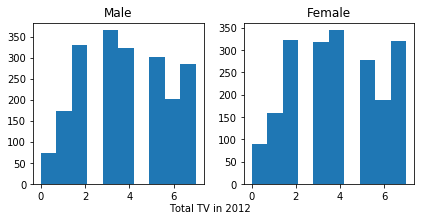

In [276]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(df2.loc[(df2['year'] == 6) & (df2['gndr'] == 1.0)]['tvtot'].dropna())
axs[1].hist(df2.loc[(df2['year'] == 6) & (df2['gndr'] == 2.0)]['tvtot'].dropna())

fig.text(0.4, 0, 'Total TV in 2012')
axs[0].set_title('Male')
axs[1].set_title('Female')

plt.tight_layout()
plt.show()

In [277]:
df2 = df.dropna()

tukey = pairwise_tukeyhsd(endog=df2['tvtot'],      # Data
                          groups=df2['gndr'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
1.0,2.0,0.072,-0.0152,0.1593,False


The tukey test appears to indicate that both of these are normal distributions. We can thus use a t-test to compare the two groups.

In [278]:
tv_men = (df2.loc[(df2['year']==6) & (df2['gndr']==1.0)])['tvtot']
tv_women = (df2.loc[(df2['year']==6) & (df2['gndr']==2.0)])['tvtot']

stats.ttest_ind(tv_men, tv_women, equal_var=False)

Ttest_indResult(statistic=-0.7321850526951791, pvalue=0.46409787829722293)

In [279]:
print('Average TV time in 2012 for men: {}'.format(tv_men.mean()))
print('Average TV time in 2012 for women: {}'.format(tv_women.mean()))

Average TV time in 2012 for men: 3.8592303945445687
Average TV time in 2012 for women: 3.9053518334985133


Since our p-value is greater than 0.05, it appears men and women are not statistically different. Men and women watched roughly the same amount of TV in 2012.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

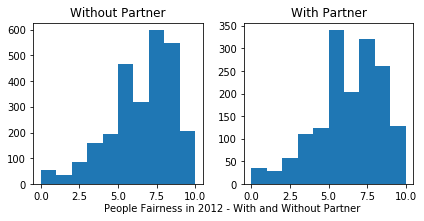

In [280]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist((df.loc[(df['year']==6) & (df['partner']==1.0)])['pplfair'].dropna())
axs[1].hist((df.loc[(df['year']==6) & (df['partner']==2.0)])['pplfair'].dropna())

fig.text(0.25, 0, 'People Fairness in 2012 - With and Without Partner')
axs[0].set_title('Without Partner')
axs[1].set_title('With Partner')

plt.tight_layout()
plt.show()

In [281]:
df2 = df.dropna()

tukey = pairwise_tukeyhsd(endog=df2['pplfair'],      # Data
                          groups=df2['partner'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
1.0,2.0,-0.1484,-0.243,-0.0538,True


These distributions are non-normal. Since the variables are independent, we should use a Kruskal-Wallace test.

In [282]:
partner = (df.loc[(df['year']==6) & (df['partner']==1.0)])['pplfair']
alone = (df.loc[(df['year']==6) & (df['partner']==2.0)])['pplfair']
    
kruskal(partner, alone, nan_policy='omit')

KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

In [283]:
print('Average people fairness - living with partner: {}'.format(partner.mean()))
print('Average people fairness - living alone: {}'.format(alone.mean()))

Average people fairness - living with partner: 6.080736012016523
Average people fairness - living alone: 5.856965174129353


Since our p-value is less than 0.05, the two populations are statistically different. Those living with a partner in 2012 were more likely to believe people were fair.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [284]:
countries[:3]

['CH', 'CZ', 'DE']

In [285]:
df3 = df.loc[df['cntry'].isin(countries[:3])].dropna()

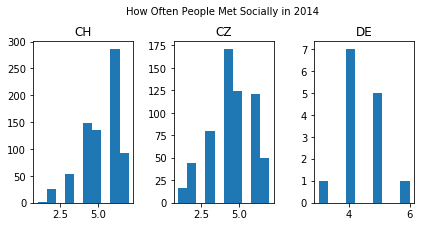

In [286]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist((df3.loc[(df3['year']==7) & (df3['cntry']=='CH')])['sclmeet'].dropna())
axs[1].hist((df3.loc[(df3['year']==7) & (df3['cntry']=='CZ')])['sclmeet'].dropna())
axs[2].hist((df3.loc[(df3['year']==7) & (df3['cntry']=='DE')])['sclmeet'].dropna())

fig.text(0.3, 1, 'How Often People Met Socially in 2014')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
    
plt.tight_layout()
plt.show()

In [287]:
tukey = pairwise_tukeyhsd(endog=df3['sclmeet'],      # Data
                          groups=df3['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.5367,-0.6662,-0.4073,True
CH,DE,-0.4832,-1.1308,0.1645,False
CZ,DE,0.0536,-0.5953,0.7025,False


These distributions are non-normal, and the variables are independent. Thus, we will use a Kruskal-Wallace test.

In [288]:
CH_social = (df3.loc[(df3['year']==7) & (df3['cntry']=='CH')])['sclmeet']
CZ_social = (df3.loc[(df3['year']==7) & (df3['cntry']=='CZ')])['sclmeet']
DE_social = (df3.loc[(df3['year']==7) & (df3['cntry']=='DE')])['sclmeet']

stats.kruskal(CH_social, CZ_social, DE_social)

KruskalResult(statistic=78.92727862878502, pvalue=7.263721926337026e-18)

In [289]:
print('Average number of times people met socially in CH in 2014: {}'.format(CH_social.mean()))
print('Average number of times people met socially in CZ in 2014: {}'.format(CZ_social.mean()))
print('Average number of times people met socially in DE in 2014: {}'.format(DE_social.mean()))

Average number of times people met socially in CH in 2014: 5.174966352624495
Average number of times people met socially in CZ in 2014: 4.4950495049504955
Average number of times people met socially in DE in 2014: 4.428571428571429


Since our p-value is less than 0.05, the populations are statistically different. Switzerland appears to have been the most social country in 2014, with 5.17 meetings on average. Czech Republic and Denmark were much lower at 4.50 and 4.43, respectively.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

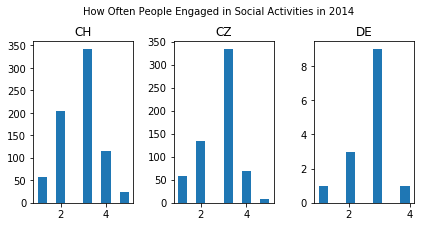

In [290]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(df3['sclact'][(df3['cntry'] == 'CH') & (df3['year'] == 7)].dropna())
axs[1].hist(df3['sclact'][(df3['cntry'] == 'CZ') & (df3['year'] == 7)].dropna())
axs[2].hist(df3['sclact'][(df3['cntry'] == 'DE') & (df3['year'] == 7)].dropna())

fig.text(0.2, 1, 'How Often People Engaged in Social Activities in 2014')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
    
plt.tight_layout()
plt.show()

In [291]:
tukey = pairwise_tukeyhsd(endog=df3['sclact'],      # Data
                          groups=df3['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0742,-0.1553,0.0069,False
CH,DE,0.067,-0.3387,0.4727,False
CZ,DE,0.1412,-0.2653,0.5478,False


Since we have three or more independent groups, and they appear to be normally distributed, we will use the one-way ANOVA test.

In [292]:
CH_sclmeet = (df3.loc[(df3['year']==7) & (df3['cntry']=='CH')])['sclact']
CZ_sclmeet = (df3.loc[(df3['year']==7) & (df3['cntry']=='CZ')])['sclact']
DE_sclmeet = (df3.loc[(df3['year']==7) & (df3['cntry']=='DE')])['sclact']

stats.f_oneway(CH_sclmeet, CZ_sclmeet, DE_sclmeet)

F_onewayResult(statistic=0.6805323062052006, pvalue=0.5065197308755334)

In [293]:
print('Average number of times people took part in social activities in CH in 2014: {}'.format(CH_sclmeet.mean()))
print('Average number of times people took part in social activities in CZ in 2014: {}'.format(CZ_sclmeet.mean()))
print('Average number of times people took part in social activities in DE 2014: {}'.format(DE_sclmeet.mean()))

Average number of times people took part in social activities in CH in 2014: 2.784656796769852
Average number of times people took part in social activities in CZ in 2014: 2.7293729372937294
Average number of times people took part in social activities in DE 2014: 2.7142857142857144


Our p-value is greater than 0.05, which means the populations are not statistically different. In 2014, people took part in roughly the same amount of social activities in Switzerland, Czech Republic, and Germany.